# Learning Representations with Autoencoders
An autoencoder is an unsupervised machine learning algorithm that learns low-dimensional representations of the input examples. Autoencoders usually consist of a compression (or encoding) and a decompression (or decoding) function. Data representations are learned automatically from examples and are data-specific and lossy. Specifically, an autoencoder learns to compress data from the input layer into a short code, and then uncompress that code into something that closely matches the original data. Autoencoders can learn how to ignore noise and can thus be thought of as dimensionality reduction techniques.

In this part of the lab, we will develop an autoencoder for learning low-dimensional representations of handwritten digits using the [Keras](https://keras.io/) library. We will employ the well-known [MNIST dataset](http://yann.lecun.com/exdb/mnist/). The dataset was created by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models. Each instance corresponds to the image of a digit taken from a scanned document. Each image is a 28 by 28 pixel square (784 pixels total), and the digits are normalized in size and centred. There are 10 digits in total (0 to 9). Hence, there are 10 classes in total. The dataset is spit into a training set consisting of 60,000 images and a test set of 10,000 images.

Keras provides a function for directly loading the MNIST dataset. The dataset is downloaded automatically the first time this function is called and is stored in the disk. Run the following code to load the MNIST dataset. Then, use the ``show`` function (already implemented) to visualize a digit of the training set.

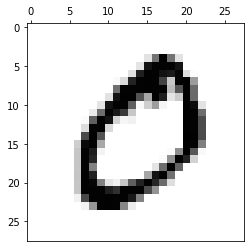

In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

os.environ['KMP_DUPLICATE_LIB_OK']='True'

from tensorflow.keras.datasets import mnist

def show(image):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

show(X_train[1])

To reduce training time, we will carry out experiments only on a subset of the dataset. Specifically, we will consider only the first 10,000 instances of the training set and the first 1,000 instances of the test set.

In [37]:
#your code here
X_train=X_train[:10000,:,:]
y_train=y_train[:10000]

X_test=X_test[:1000,:,:]
y_test=y_test[:1000]

print("Shape",X_train.shape)

Shape (10000, 28, 28)


The images contained in the MNIST dataset are two-dimensional matrices (shape: (width, height)). Use the [reshape](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.reshape.html) function of NumPy to transform each image to a vector by stacking all pixels into a column.

In [38]:
#your code here
X_train=np.reshape(X_train,(X_train.shape[0],28*28)) # Used to flatten the images
X_test=np.reshape(X_test,(X_test.shape[0],28*28))
print("Shape",X_train.shape)

Shape (10000, 784)


The final preprocessing step is to convert the type of the images to float32 and to normalize their values to the range [0,1].

In [39]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # Normalize the values (0-255 -> 0-1)
X_test /= 255  # Normalize the values (0-255 -> 0-1)
print("Shape of training matrix:", X_train.shape)
print("Shape of test matrix:", X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Shape of training matrix: (10000, 784)
Shape of test matrix: (10000, 784)
10000 train samples
1000 test samples


### A simple autoencoder
We will first implement a very simple autoencoder. As discussed before, the autoencoder consists of two parts: an encoder and a decoder. Both the encoder and the decoder of our autoencoder will be single fully-connected neural network layers. 

To implement the autoencoder, we will use the [functional API](https://keras.io/getting-started/functional-api-guide/). The functional API requires the user to define a standalone Input layer that specifies the shape of input data. The input layer takes as input a tuple that indicates the dimensionality of the input data. When the input data is one-dimensional (as in our case), the shape must explicitly leave room for the shape of the mini-batch size. Therefore, the shape tuple is always defined with a hanging last dimension when the input is one-dimensional:
```
my_input = Input(shape=(dimension,))
```

In [8]:
from tensorflow.keras.layers import Input

image_size=X_train.shape[1]
#your code here
my_input=Input(shape=(image_size,))


We next define our encoder. As mentioned above, the encoder will be a fully-connected neural network layer. Such a layer can be implemented using the [Dense](https://keras.io/layers/core/#dense) class of Keras. Set the number of hidden units to 32 and the output of each neuron will be activated by the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. Note also that the functional API requires specifying where the input comes from when defining a layer.

In [9]:
from tensorflow.keras.layers import Dense

#your code here
encoder=Dense(units=32,activation='relu')(my_input)

Next, we will implement the decoder. The decoder will also be a fully-connected neural network layer. Set the number of hidden units equal to the initial size of the images. The activation function will be the [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) since the output values are required to range in [0,1]. Note also that the functional API requires specifying where the input comes from when defining a layer. The decoder takes as input the output of the encoder.

In [10]:
#your code here
decoder=Dense(units=image_size,activation='sigmoid')(encoder)

After creating the encoder and the decoder and connecting them together, we can define the model. Keras provides a [Model class](https://keras.io/models/model/) that we can use to create a model from your created layers. It requires that you only specify the input and output layers. For example, given the an input and an output, we can define the model as follows:
```
model = Model(input, output)
```
The model maps an input image to its reconstructed image.

In [13]:
from tensorflow.keras.models import Model

#your code here
model=Model(my_input,decoder)

After creating the model, you can compile it and set the loss function and optimization algorithm.

In [14]:
model.compile(optimizer='RMSprop', loss='mean_squared_error')

Subsequently, we will train the model on CPU. Use the [fit](https://keras.io/models/model/#methods) function of Keras to train the model. Set the number of epochs to 20 and the batch size to 64.

In [16]:
#your code here
model.fit(X_train,X_train,epochs=20, batch_size=64)

Train on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 1s 104us/sample - loss: 0.0103
Epoch 2/20
10000/10000 [==============================] - 1s 95us/sample - loss: 0.0103
Epoch 3/20
10000/10000 [==============================] - 1s 94us/sample - loss: 0.0103
Epoch 4/20
10000/10000 [==============================] - 1s 94us/sample - loss: 0.0102
Epoch 5/20
10000/10000 [==============================] - 1s 98us/sample - loss: 0.0102
Epoch 6/20
10000/10000 [==============================] - 1s 95us/sample - loss: 0.0102
Epoch 7/20
10000/10000 [==============================] - 1s 95us/sample - loss: 0.0102
Epoch 8/20
10000/10000 [==============================] - 1s 96us/sample - loss: 0.0102
Epoch 9/20
10000/10000 [==============================] - 1s 95us/sample - loss: 0.0101
Epoch 10/20
10000/10000 [==============================] - 1s 94us/sample - loss: 0.0101
Epoch 11/20
10000/10000 [==============================] - 1s 95us/sample - loss: 0.0101
Epoch 

To find out how well our model can reconstruct the test images, we will visualize some images of the test set along with their corresponding reconstructed images. What do you observe?

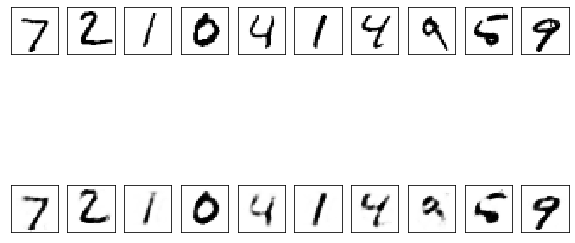

In [18]:
reconstructed_imgs = model.predict(X_test)

n = 10
fig = plt.figure(figsize=(10,6))
for i in range(n):
    ax = fig.add_subplot(2, n, i + 1)
    imgplot = ax.imshow(X_test[i].reshape(img_rows, img_cols), cmap=cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = fig.add_subplot(2, n, i + 1 + n)
    imgplot = ax.imshow(reconstructed_imgs[i].reshape(img_rows, img_cols), cmap=cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [26]:
vector_32d=model.get_layer("dense_1")
print(model.layers[1].output)

Tensor("dense_1/Identity:0", shape=(None, 32), dtype=float32)


### A deeper autoencoder
The autoencoder we implemented above is relatively simple. Both the encoder and the decoder are single-layer networks. We could instead use a stack of layers for both of them. Use the functional API to implement a deeper autoencoder with the following architecture:
- Encoder
    - The first layer will contain 128 neurons and a ReLU activation function
    - The second layer will contain 64 neurons and a ReLU activation function
    - The third layer will contain 32 neurons and a ReLU activation function
- Decoder
    - The first layer will contain 64 neurons and a ReLU activation function
    - The second layer will contain 128 neurons and a ReLU activation function
    - The third layer will contain 784 neurons and a sigmoid activation function

In [27]:
#your code here
image_size=X_train.shape[1]

my_input=Input(shape=(image_size,))
encoder1=Dense(units=128,activation='relu')(my_input)
encoder2=Dense(units=64,activation='relu')(encoder1)
code=Dense(units=32,activation='relu')(encoder2)
decoder1=Dense(units=64,activation='relu')(code)
decoder2=Dense(units=128,activation='relu')(decoder1)
output=Dense(units=image_size,activation='sigmoid')(decoder2)



Use the [Model class](https://keras.io/models/model/) to create a model from the layers you created. Once the model is created, compile it and set the loss function and optimization algorithm.

In [28]:
model_L2=Model(my_input,output)
model_L2.compile(optimizer='RMSprop', loss='mean_squared_error')

Train the model using the [fit](https://keras.io/models/model/#methods) function of Keras. Set the number of epochs to 30 and the batch size to 64.

In [29]:
model_L2.fit(X_train,X_train,epochs=30, batch_size=64)

Train on 10000 samples
Epoch 1/30
10000/10000 [==============================] - 3s 315us/sample - loss: 0.0599
Epoch 2/30
10000/10000 [==============================] - 1s 142us/sample - loss: 0.0392
Epoch 3/30
10000/10000 [==============================] - 1s 142us/sample - loss: 0.0338
Epoch 4/30
10000/10000 [==============================] - 1s 143us/sample - loss: 0.0299
Epoch 5/30
10000/10000 [==============================] - 1s 142us/sample - loss: 0.0273
Epoch 6/30
10000/10000 [==============================] - 1s 143us/sample - loss: 0.0251
Epoch 7/30
10000/10000 [==============================] - 1s 143us/sample - loss: 0.0236
Epoch 8/30
10000/10000 [==============================] - 1s 143us/sample - loss: 0.0223
Epoch 9/30
10000/10000 [==============================] - 1s 143us/sample - loss: 0.0212
Epoch 10/30
10000/10000 [==============================] - 1s 144us/sample - loss: 0.0204
Epoch 11/30
10000/10000 [==============================] - 1s 143us/sample - loss: 0.0

Next, we will use the representations of the images learned by the autoencoder to visualize them. Specifically, we will apply the [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) algorithm on the learned representations to project the images to the two-dimensional space. We will then plot the digits and give different colors to the digits of each class. Are images belonging to the same class close to each other in the embedding space?

In [33]:
encoded_imgs.shape

(1000, 32)

In [40]:
y_test.shape

(1000,)

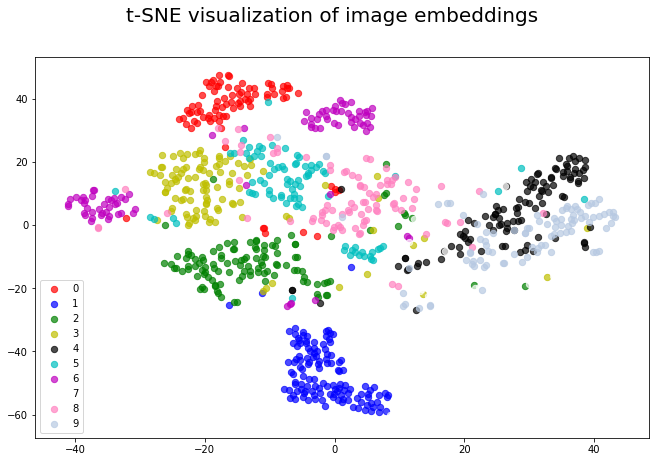

In [41]:
from sklearn.manifold import TSNE

encoder = Model(my_input,code) # this model maps an input to its encoded representation
encoded_imgs = encoder.predict(X_test) 

tsne = TSNE(n_components=2)
embeddings = tsne.fit_transform(encoded_imgs)

labels_plt = list(y_test)

palette = plt.get_cmap('hsv',len(list(set(labels_plt))))
fig, ax = plt.subplots()

my_colors = {0:'r', 1:'b', 2: 'g', 3:'y', 4:'k', 5:'c', 6:'m', 7:'w', 8:'#ff81c0', 9:'#b7c9e2'}

for label in list(set(labels_plt)):
    idxs = [idx for idx,elt in enumerate(labels_plt) if elt==label]
    ax.scatter(embeddings[idxs,0], 
               embeddings[idxs,1], 
               c = my_colors[label],
               label=str(label),
               alpha=0.7,
               s=40)

ax.legend(scatterpoints=1)
fig.suptitle('t-SNE visualization of image embeddings',fontsize=20)
fig.set_size_inches(11,7)

### Image denoising
We will next use an autoencoder to address an image denoising problem. The goal of such an autoencoder is to learn a representation that is robust to noise. Hence, we will train the autoencoder to map noisy images to clean images.

First, we will generate noisy images by adding gaussian noise to each image and clipping the emerging images between 0 and 1.

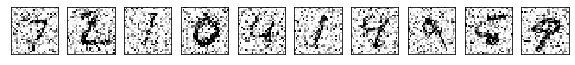

In [42]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

n = 10
fig = plt.figure(figsize=(10,6))
for i in range(n):
    ax = fig.add_subplot(1, n, i + 1)
    imgplot = ax.imshow(X_test_noisy[i].reshape(img_rows, img_cols), cmap=cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Use exactly the same deep architecture you implemented above, and train the model. Set the number of epochs to 50 and the batch size to 64. Note that the input to the autoencoder is now the noisy images while the output is still the clean images.

In [43]:
#your code here
image_size=X_train.shape[1]

my_input=Input(shape=(image_size,))
encoder1=Dense(units=128,activation='relu')(my_input)
encoder2=Dense(units=64,activation='relu')(encoder1)
code=Dense(units=32,activation='relu')(encoder2)
decoder1=Dense(units=64,activation='relu')(code)
decoder2=Dense(units=128,activation='relu')(decoder1)
output=Dense(units=image_size,activation='sigmoid')(decoder2)

model_L2=Model(my_input,output)
model_L2.compile(optimizer='RMSprop', loss='mean_squared_error')
model_L2.fit(X_train_noisy,X_train,epochs=30, batch_size=64) # Trin on the noisy images, learn to original image

Train on 10000 samples
Epoch 1/30
10000/10000 [==============================] - 3s 290us/sample - loss: 0.0675
Epoch 2/30
10000/10000 [==============================] - 2s 162us/sample - loss: 0.0502
Epoch 3/30
10000/10000 [==============================] - 2s 160us/sample - loss: 0.0425
Epoch 4/30
10000/10000 [==============================] - 2s 150us/sample - loss: 0.0391
Epoch 5/30
10000/10000 [==============================] - 1s 149us/sample - loss: 0.0365
Epoch 6/30
10000/10000 [==============================] - 1s 149us/sample - loss: 0.0345
Epoch 7/30
10000/10000 [==============================] - 1s 150us/sample - loss: 0.0327
Epoch 8/30
10000/10000 [==============================] - 1s 150us/sample - loss: 0.0313
Epoch 9/30
10000/10000 [==============================] - 2s 151us/sample - loss: 0.0302
Epoch 10/30
10000/10000 [==============================] - 2s 150us/sample - loss: 0.0293
Epoch 11/30
10000/10000 [==============================] - 2s 155us/sample - loss: 0.0

Use the [predict](https://keras.io/models/model/) function of Keras to generate the reconstructed representations of the noisy test images. Then, plot the first 10 noisy images of the test set along with the corresponding reconstructed images. What do you observe?

In [46]:
#your code here
encoder = Model(my_input,output) # this model maps an input to its encoded representation
encoded_imgs = encoder.predict(X_test_noisy) 

- Noisy Images
- Re-constructed Images from the Auto-Encoder NN
- Original Images


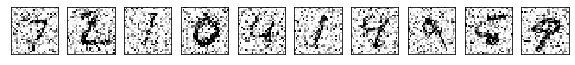

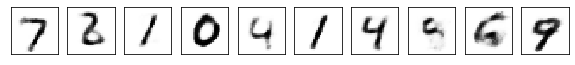

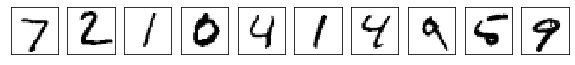

In [53]:
n = 10
print('- Noisy Images')
fig = plt.figure(figsize=(10,6))
for i in range(n):
    ax = fig.add_subplot(1, n, i + 1)
    imgplot = ax.imshow(X_test_noisy[i].reshape(img_rows, img_cols), cmap=cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False) 


fig = plt.figure(figsize=(10,6))
print('- Re-constructed Images from the Auto-Encoder NN')
for i in range(n):
    ax = fig.add_subplot(1, n, i + 1)
    imgplot = ax.imshow(encoded_imgs[i].reshape(img_rows, img_cols), cmap=cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

print('- Original Images')
fig = plt.figure(figsize=(10,6))
for i in range(n):
    ax = fig.add_subplot(1, n, i + 1)
    imgplot = ax.imshow(X_test[i].reshape(img_rows, img_cols), cmap=cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
